In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

plt.style.use('ggplot')

In [9]:
df = pd.read_csv('Data/Reviews.csv')
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [10]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [11]:
print(df.shape)

(568454, 10)


In [12]:
df = df.head(5000)
df.shape

(5000, 10)

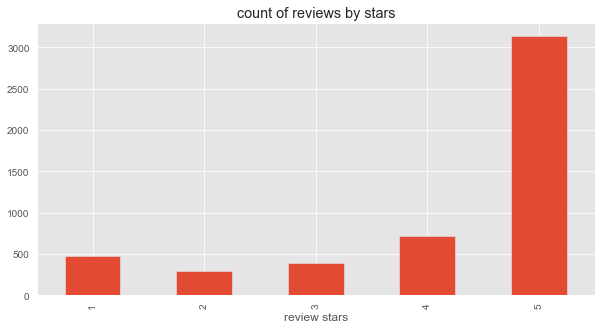

In [13]:
## EDA
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar', title='count of reviews by stars',figsize= (10,5))
ax.set_xlabel('review stars')
plt.show()



Basic NLTK

In [26]:
example = df['Text'][55]
print(example)

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


In [27]:

tokens = nltk.word_tokenize(example)
print(tokens)

['We', 'roast', 'these', 'in', 'a', 'large', 'cast', 'iron', 'pan', 'on', 'the', 'grill', '(', 'about', '1/3', 'of', 'the', 'bag', 'at', 'a', 'time', ')', '.', 'The', 'smell', 'is', 'wonderful', 'and', 'the', 'roasted', 'beans', 'taste', 'delicious', 'too', '.', 'More', 'importantly', ',', 'the', 'coffee', 'is', 'smooth', ';', 'no', 'bitter', 'aftertaste', '.', 'On', 'numerous', 'occasions', ',', 'we', "'ve", 'had', 'to', 'send', 'the', 'roasted', 'beans', 'home', 'with', 'friends', 'because', 'they', 'like', 'it', 'so', 'much', '.']


In [28]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('We', 'PRP'), ('roast', 'VBP'), ('these', 'DT'), ('in', 'IN'), ('a', 'DT'), ('large', 'JJ'), ('cast', 'NN'), ('iron', 'NN'), ('pan', 'NN'), ('on', 'IN'), ('the', 'DT'), ('grill', 'NN'), ('(', '('), ('about', 'IN'), ('1/3', 'CD'), ('of', 'IN'), ('the', 'DT'), ('bag', 'NN'), ('at', 'IN'), ('a', 'DT'), ('time', 'NN'), (')', ')'), ('.', '.'), ('The', 'DT'), ('smell', 'NN'), ('is', 'VBZ'), ('wonderful', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('roasted', 'JJ'), ('beans', 'NNS'), ('taste', 'VBP'), ('delicious', 'JJ'), ('too', 'RB'), ('.', '.'), ('More', 'RBR'), ('importantly', 'RB'), (',', ','), ('the', 'DT'), ('coffee', 'NN'), ('is', 'VBZ'), ('smooth', 'JJ'), (';', ':'), ('no', 'DT'), ('bitter', 'JJ'), ('aftertaste', 'NN'), ('.', '.'), ('On', 'IN'), ('numerous', 'JJ'), ('occasions', 'NNS'), (',', ','), ('we', 'PRP'), ("'ve", 'VBP'), ('had', 'VBN'), ('to', 'TO'), ('send', 'VB'), ('the', 'DT'), ('roasted', 'JJ'), ('beans', 'NNS'), ('home', 'NN'), ('with', 'IN'), ('friends', 'NNS'), ('because',

In [30]:
#chunked into a sentance
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  roast/VBP
  these/DT
  in/IN
  a/DT
  large/JJ
  cast/NN
  iron/NN
  pan/NN
  on/IN
  the/DT
  grill/NN
  (/(
  about/IN
  1/3/CD
  of/IN
  the/DT
  bag/NN
  at/IN
  a/DT
  time/NN
  )/)
  ./.
  The/DT
  smell/NN
  is/VBZ
  wonderful/JJ
  and/CC
  the/DT
  roasted/JJ
  beans/NNS
  taste/VBP
  delicious/JJ
  too/RB
  ./.
  More/RBR
  importantly/RB
  ,/,
  the/DT
  coffee/NN
  is/VBZ
  smooth/JJ
  ;/:
  no/DT
  bitter/JJ
  aftertaste/NN
  ./.
  On/IN
  numerous/JJ
  occasions/NNS
  ,/,
  we/PRP
  've/VBP
  had/VBN
  to/TO
  send/VB
  the/DT
  roasted/JJ
  beans/NNS
  home/NN
  with/IN
  friends/NNS
  because/IN
  they/PRP
  like/VBP
  it/PRP
  so/RB
  much/RB
  ./.)


Step 1 : VADER Sentiment Scoring

"Bag of Words " Approach :
- Stop words are removed
- Each work is scored and combined to a total score
